In [ ]:
!pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# **INPUTAN KEDUA ALGO**

In [ ]:
INF = float('inf')

# Fungsi Graph
def visualize_graph(edges, nodes, title):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for edge in edges:
        G.add_edge(nodes[edge[0]], nodes[edge[1]], weight=edge[2])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title(title)
    plt.show()


In [ ]:
# Inisialisasi dan Input Data Graf
num_nodes = int(input("Masukkan banyak node (termasuk node pusat): "))

# Input nama node
nodes = []
print("\nMasukkan nama-nama node (contoh: Stasiun, Alun-Alun, Museum):")
for i in range(num_nodes):
    node = input(f"Nama Node {i+1}: ")
    nodes.append(node)

# Inisialisasi grap
edges = []
graph_matrix = [[INF] * num_nodes for _ in range(num_nodes)]
for i in range(num_nodes):
    graph_matrix[i][i] = 0

# Node pertama sebagai pusat
print(f"\nNode '{nodes[0]}' dijadikan node pusat yang terhubung ke semua node lainnya.")
for j in range(1, num_nodes):
    jarak = input(f"Jarak dari {nodes[0]} ke {nodes[j]} (contoh: 3 untuk 3 km): ")
    if jarak:
        jarak = int(jarak)
        edges.append((0, j, jarak))
        edges.append((j, 0, jarak))
        graph_matrix[0][j] = jarak
        graph_matrix[j][0] = jarak

# Input jarak antar node selain node pusat
print("\nMasukkan jarak antar node lainnya. Jika tidak ada jalur langsung, lewati.")
for i in range(1, num_nodes):
    for j in range(i+1, num_nodes):
        jarak = input(f"Jarak dari {nodes[i]} ke {nodes[j]} (kosongkan jika tidak ada): ")
        if jarak:
            jarak = int(jarak)
            edges.append((i, j, jarak))
            edges.append((j, i, jarak))
            graph_matrix[i][j] = jarak
            graph_matrix[j][i] = jarak


Masukkan banyak node (termasuk node pusat): 3

Masukkan nama-nama node (contoh: Stasiun, Alun-Alun, Museum):
Nama Node 1: a
Nama Node 2: b
Nama Node 3: c

Node 'a' dijadikan node pusat yang terhubung ke semua node lainnya.
Jarak dari a ke b (contoh: 3 untuk 3 km): 3
Jarak dari a ke c (contoh: 3 untuk 3 km): 2

Masukkan jarak antar node lainnya. Jika tidak ada jalur langsung, lewati.
Jarak dari b ke c (kosongkan jika tidak ada): 6


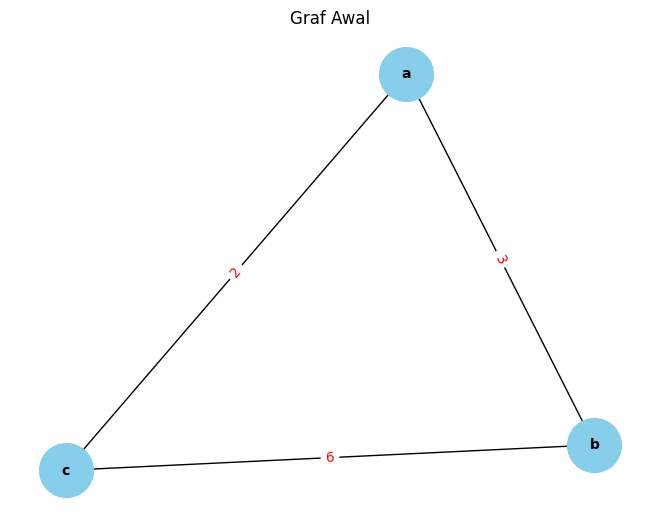

In [ ]:
# Visualisasi Graf Awal
visualize_graph(edges, nodes, "Graf Awal")

In [ ]:
# Fungsi Floyd-Warshall
def floyd_warshall(graph):
    dist = [row[:] for row in graph]
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

# Fungsi Bellman-Ford
def bellman_ford(edges, start, num_nodes):
    distances = [INF] * num_nodes
    distances[start] = 0

    for _ in range(num_nodes - 1):
        for u, v, weight in edges:
            if distances[u] != INF and distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight

    for u, v, weight in edges:
        if distances[u] != INF and distances[u] + weight < distances[v]:
            print("Graf mengandung siklus negatif.")
            return None

    return distances


In [ ]:
# Algoritma Floyd-Warshall
print("\n=== Floyd-Warshall ===")
fw_result = floyd_warshall(graph_matrix)
print("\nJarak Terpendek Antar Semua Pasangan Node:")
print("    ", end="")
for i in range(num_nodes):
    print(f"{nodes[i]:<10}", end="")
print()

# Menampilkan hasil jarak terpendek
for i in range(num_nodes):
    print(f"{nodes[i]:<4}", end="")
    for j in range(num_nodes):
        if fw_result[i][j] == INF:
            print(f"{'INF':<10}", end="")
        else:
            print(f"{fw_result[i][j]:<10}", end="")
    print()


=== Floyd-Warshall ===

Jarak Terpendek Antar Semua Pasangan Node:
    a         b         c         
a   0         3         2         
b   3         0         5         
c   2         5         0         


In [ ]:
# Algoritma Bellman-Ford
print("\n=== Bellman-Ford ===")
start_node = 0
bf_result = bellman_ford(edges, start_node, num_nodes)
if bf_result:
    print(f"\nJarak Terpendek dari Node Pusat ({nodes[start_node]}) ke Node Lainnya:")
    for i in range(num_nodes):
        if bf_result[i] == INF:
            print(f"{nodes[start_node]} -> {nodes[i]}: INF (Tidak terhubung)")
        else:
            print(f"{nodes[start_node]} -> {nodes[i]}: {bf_result[i]}")



=== Bellman-Ford ===

Jarak Terpendek dari Node Pusat (a) ke Node Lainnya:
a -> a: 0
a -> b: 3
a -> c: 2


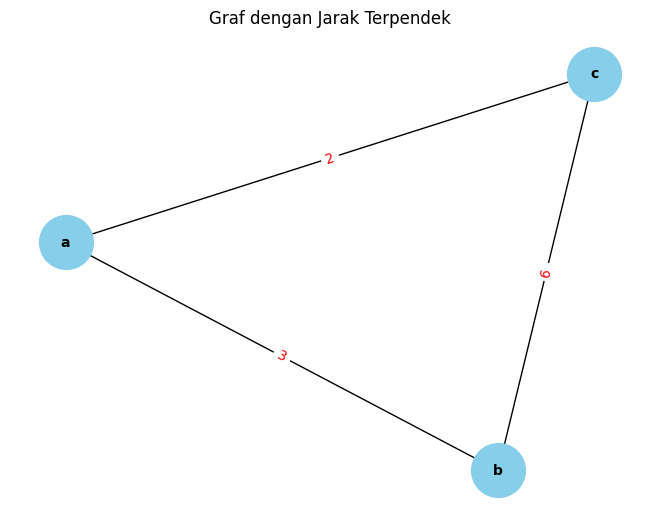

In [ ]:
# Visualisasi Graf Akhir
visualize_graph(edges, nodes, "Graf dengan Jarak Terpendek")


# **MANUAL - FYLOD**

In [ ]:
places = [
    'Stasiun Purwokerto', 'Alun Alun Purwokerto', 'Menara Pandang Teratai',
    'Museum Bank Rakyat Indonesia', 'Museum Panglima Besar TNI Jenderal Soedirman',
    'Taman Mas Kemambang', 'Lokawisata Baturraden', 'Embung Banteran',
    'Wisata Pagubugan Melung', 'Wana Wisata Baturraden'
]
INF = float('inf')
distance_matrix = np.array([
    [0.0, 1.2, 3.8, 0.75, 3.9, 2.6, 13.6, 11.2, 12.3, 13.9],  # Stasiun Purwokerto
    [1.2, 0.0, 5.1, 0.65, 4.3, 2.1, 13.2, 10.8, 12.8, 13.5],  # Alun Alun Purwokerto
    [3.8, 5.1, 0.0, 5.4, 7.6, 5.9, 17.9, 15.4, 17.8, 18.2],   # Menara Pandang Teratai
    [0.75, 0.65, 5.4, 0.0, 3.7, 2.6, 13.7, 11.3, 12.7, 14.0],  # Museum Bank Rakyat Indonesia
    [3.9, 4.3, 7.6, 3.7, 0.0, 6.4, 17.3, 14.9, 12.3, 17.6],   # Museum Panglima Besar TNI Jenderal Soedirman
    [2.6, 2.1, 5.9, 2.6, 6.4, 0.0, 12.0, 8.7, 12.2, 12.4],    # Taman Mas Kemambang
    [13.6, 13.2, 17.9, 13.7, 17.3, 12.0, 0.0, 9.3, 5.0, 1.5],  # Lokawisata Baturraden
    [11.2, 10.8, 15.4, 11.3, 14.9, 8.7, 9.3, 0.0, 11.6, 8.3],  # Embung Banteran
    [12.3, 12.8, 17.8, 12.7, 12.3, 12.2, 5.0, 11.6, 0.0, 5.5],  # Wisata Pagubugan Melung
    [13.9, 13.5, 18.2, 14.0, 17.6, 12.4, 1.5, 8.3, 5.5, 0.0]    # Wana Wisata Baturraden
])

In [ ]:
# Function Algoritma Floyd-Warshall
def floyd_warshall(dist_matrix):
    n = len(dist_matrix)
    dist = np.copy(dist_matrix)
    next_node = np.full((n, n), -1, dtype=int)

    # Menyimpan jalur terpendek
    for i in range(n):
        for j in range(n):
            if dist[i][j] != INF and i != j:
                next_node[i][j] = j
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    return dist, next_node


In [ ]:
# Func to find jarak terpendek
def get_shortest_path(next_node, start, end):
    if next_node[start][end] == -1:  # Jika tidak ada jalur
        return []

    path = [start]
    while start != end:
        start = next_node[start][end]
        path.append(start)

    return path

In [ ]:
# Applied fylod
distances, next_node = floyd_warshall(distance_matrix)

In [ ]:
# Function to measure memory usage
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # in M

In [ ]:
start_time_fw = time.time()
distances_fw, next_node_fw = floyd_warshall(distance_matrix)
end_time_fw = time.time()
fw_time = end_time_fw - start_time_fw
fw_memory = memory_usage()

In [ ]:
print("=============================================")
print(f"Floyd-Warshall Time: {fw_time:.4f} seconds")
print(f"Floyd-Warshall Memory: {fw_memory:.2f} MB")
print("=============================================")

Floyd-Warshall Time: 0.0021 seconds
Floyd-Warshall Memory: 138.45 MB


In [ ]:

# Show jarak terpendek antara Stasiun Purwokerto ke tempat wisata
print("=============================================")
print("Jarak Terpendek (dalam km) dari Stasiun Purwokerto:")
print("=============================================")
for i in range(len(places)):
    if distances[0][i] != INF:
        print(f"Ke {places[i]}: {distances[0][i]} km")
print("\n=============================================")

Jarak Terpendek (dalam km) dari Stasiun Purwokerto:
Ke Stasiun Purwokerto: 0.0 km
Ke Alun Alun Purwokerto: 1.2 km
Ke Menara Pandang Teratai: 3.8 km
Ke Museum Bank Rakyat Indonesia: 0.75 km
Ke Museum Panglima Besar TNI Jenderal Soedirman: 3.9 km
Ke Taman Mas Kemambang: 2.6 km
Ke Lokawisata Baturraden: 13.6 km
Ke Embung Banteran: 11.2 km
Ke Wisata Pagubugan Melung: 12.3 km
Ke Wana Wisata Baturraden: 13.9 km



In [ ]:
# Show jalur terpendek
print("=============================================")
print("Jalur Terpendek dari Stasiun Purwokerto ke Tempat Wisata:")
print("=============================================")
for i in range(1, len(places)):  # Mulai dari tempat selain Stasiun Purwokerto
    path = get_shortest_path(next_node, 0, i)  # 0 adalah index Stasiun Purwokerto
    path_names = [places[k] for k in path]
    print(f"Ke {places[i]}: {' -> '.join(path_names)}")


Jalur Terpendek dari Stasiun Purwokerto ke Tempat Wisata:
Ke Alun Alun Purwokerto: Stasiun Purwokerto -> Alun Alun Purwokerto
Ke Menara Pandang Teratai: Stasiun Purwokerto -> Menara Pandang Teratai
Ke Museum Bank Rakyat Indonesia: Stasiun Purwokerto -> Museum Bank Rakyat Indonesia
Ke Museum Panglima Besar TNI Jenderal Soedirman: Stasiun Purwokerto -> Museum Panglima Besar TNI Jenderal Soedirman
Ke Taman Mas Kemambang: Stasiun Purwokerto -> Taman Mas Kemambang
Ke Lokawisata Baturraden: Stasiun Purwokerto -> Lokawisata Baturraden
Ke Embung Banteran: Stasiun Purwokerto -> Embung Banteran
Ke Wisata Pagubugan Melung: Stasiun Purwokerto -> Wisata Pagubugan Melung
Ke Wana Wisata Baturraden: Stasiun Purwokerto -> Wana Wisata Baturraden


In [ ]:
G = nx.Graph()
for i in range(len(places)):
    for j in range(i + 1, len(places)):
        if distance_matrix[i][j] != INF:
            G.add_edge(places[i], places[j], weight=distance_matrix[i][j])
pos = nx.spring_layout(G, seed=42, k=0.3)

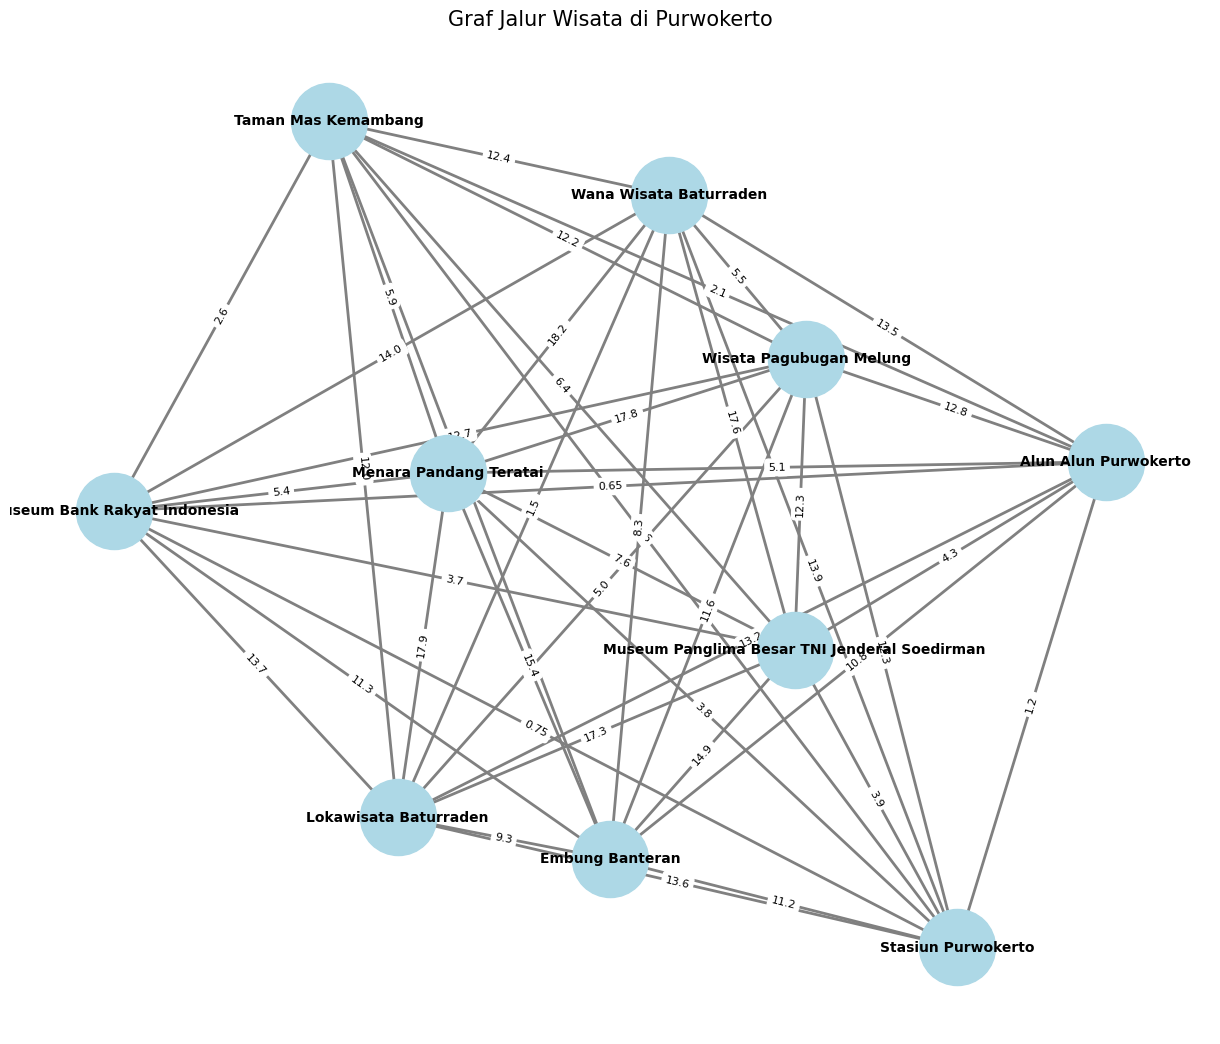

In [ ]:
# Visualisasi graf
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.title("Graf Jalur Wisata di Purwokerto", fontsize=15)
plt.axis('off')
plt.show()

# **MANUAL-BALLMAN**

In [ ]:
places = [
    'Stasiun Purwokerto', 'Alun Alun Purwokerto', 'Menara Pandang Teratai',
    'Museum Bank Rakyat Indonesia', 'Museum Panglima Besar TNI Jenderal Soedirman',
    'Taman Mas Kemambang', 'Lokawisata Baturraden', 'Embung Banteran',
    'Wisata Pagubugan Melung', 'Wana Wisata Baturraden'
]

INF = float('inf')
distance_matrix = np.array([
    [0.0, 1.2, 3.8, 0.75, 3.9, 2.6, 13.6, 11.2, 12.3, 13.9],  # Stasiun Purwokerto
    [1.2, 0.0, 5.1, 0.65, 4.3, 2.1, 13.2, 10.8, 12.8, 13.5],  # Alun Alun Purwokerto
    [3.8, 5.1, 0.0, 5.4, 7.6, 5.9, 17.9, 15.4, 17.8, 18.2],   # Menara Pandang Teratai
    [0.75, 0.65, 5.4, 0.0, 3.7, 2.6, 13.7, 11.3, 12.7, 14.0],  # Museum Bank Rakyat Indonesia
    [3.9, 4.3, 7.6, 3.7, 0.0, 6.4, 17.3, 14.9, 12.3, 17.6],   # Museum Panglima Besar TNI Jenderal Soedirman
    [2.6, 2.1, 5.9, 2.6, 6.4, 0.0, 12.0, 8.7, 12.2, 12.4],    # Taman Mas Kemambang
    [13.6, 13.2, 17.9, 13.7, 17.3, 12.0, 0.0, 9.3, 5.0, 1.5],  # Lokawisata Baturraden
    [11.2, 10.8, 15.4, 11.3, 14.9, 8.7, 9.3, 0.0, 11.6, 8.3],  # Embung Banteran
    [12.3, 12.8, 17.8, 12.7, 12.3, 12.2, 5.0, 11.6, 0.0, 5.5],  # Wisata Pagubugan Melung
    [13.9, 13.5, 18.2, 14.0, 17.6, 12.4, 1.5, 8.3, 5.5, 0.0]    # Wana Wisata Baturraden
])

In [ ]:
#Function Bellman
def bellman_ford(dist_matrix, source):
    n = len(dist_matrix)
    dist = [INF] * n
    dist[source] = 0  # Jarak dari sumber ke dirinya sendiri adalah 0
    prev = [-1] * n  # Array untuk menyimpan jalur terpendek

    # Iterasi sebanyak n-1 kali
    for _ in range(n-1):
        for u in range(n):
            for v in range(n):
                if dist[u] != INF and dist[u] + dist_matrix[u][v] < dist[v]:
                    dist[v] = dist[u] + dist_matrix[u][v]
                    prev[v] = u

    return dist, prev

In [ ]:
# Function to find jalur terpendek
def get_shortest_path(prev, start, end):
    path = []
    while end != -1:
        path.append(end)
        end = prev[end]
    return path[::-1]  # return urutan untuk get jalur dari start ke end


In [ ]:
# applied bellman
distances, prev_node = bellman_ford(distance_matrix, 0)  # 0 adalah index Stasiun Purwokerto

In [ ]:
# Function to measure memory usage
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # in M

In [ ]:
start_time_bf = time.time()
distances_bf = bellman_ford(distance_matrix, 0)
end_time_bf = time.time()
bf_time = end_time_bf - start_time_bf
bf_memory = memory_usage()

In [ ]:
print("\n=============================================")
print(f"Bellman-Ford Time: {bf_time:.4f} seconds")
print(f"Bellman-Ford Memory: {bf_memory:.2f} MB")
print("=============================================")


Bellman-Ford Time: 0.0010 seconds
Bellman-Ford Memory: 155.25 MB


In [ ]:
# Show jarak terpendek antara Stasiun Purwokerto ke tempat wisata
print("=============================================")
print("Jarak Terpendek (dalam km) dari Stasiun Purwokerto:")
print("=============================================")
for i in range(len(places)):
    if distances[i] != INF:
        print(f"Ke {places[i]}: {distances[i]} km")
print("\n=============================================")

Jarak Terpendek (dalam km) dari Stasiun Purwokerto:
Ke Stasiun Purwokerto: 0 km
Ke Alun Alun Purwokerto: 1.2 km
Ke Menara Pandang Teratai: 3.8 km
Ke Museum Bank Rakyat Indonesia: 0.75 km
Ke Museum Panglima Besar TNI Jenderal Soedirman: 3.9 km
Ke Taman Mas Kemambang: 2.6 km
Ke Lokawisata Baturraden: 13.6 km
Ke Embung Banteran: 11.2 km
Ke Wisata Pagubugan Melung: 12.3 km
Ke Wana Wisata Baturraden: 13.9 km



In [ ]:
# Show Jalur Terpendek
print("=============================================")
print("Jalur Terpendek dari Stasiun Purwokerto ke Tempat Wisata:")
print("=============================================")
for i in range(1, len(places)):  # Mulai dari tempat selain Stasiun Purwokerto
    path = get_shortest_path(prev_node, 0, i)  # 0 adalah index Stasiun Purwokerto
    path_names = [places[k] for k in path]
    print(f"Ke {places[i]}: {' -> '.join(path_names)}")

Jalur Terpendek dari Stasiun Purwokerto ke Tempat Wisata:
Ke Alun Alun Purwokerto: Stasiun Purwokerto -> Alun Alun Purwokerto
Ke Menara Pandang Teratai: Stasiun Purwokerto -> Menara Pandang Teratai
Ke Museum Bank Rakyat Indonesia: Stasiun Purwokerto -> Museum Bank Rakyat Indonesia
Ke Museum Panglima Besar TNI Jenderal Soedirman: Stasiun Purwokerto -> Museum Panglima Besar TNI Jenderal Soedirman
Ke Taman Mas Kemambang: Stasiun Purwokerto -> Taman Mas Kemambang
Ke Lokawisata Baturraden: Stasiun Purwokerto -> Lokawisata Baturraden
Ke Embung Banteran: Stasiun Purwokerto -> Embung Banteran
Ke Wisata Pagubugan Melung: Stasiun Purwokerto -> Wisata Pagubugan Melung
Ke Wana Wisata Baturraden: Stasiun Purwokerto -> Wana Wisata Baturraden


In [ ]:
G = nx.Graph()
for i in range(len(places)):
    for j in range(i + 1, len(places)):
        if distance_matrix[i][j] != INF:
            G.add_edge(places[i], places[j], weight=distance_matrix[i][j])
pos = nx.spring_layout(G, seed=42, k=0.3)

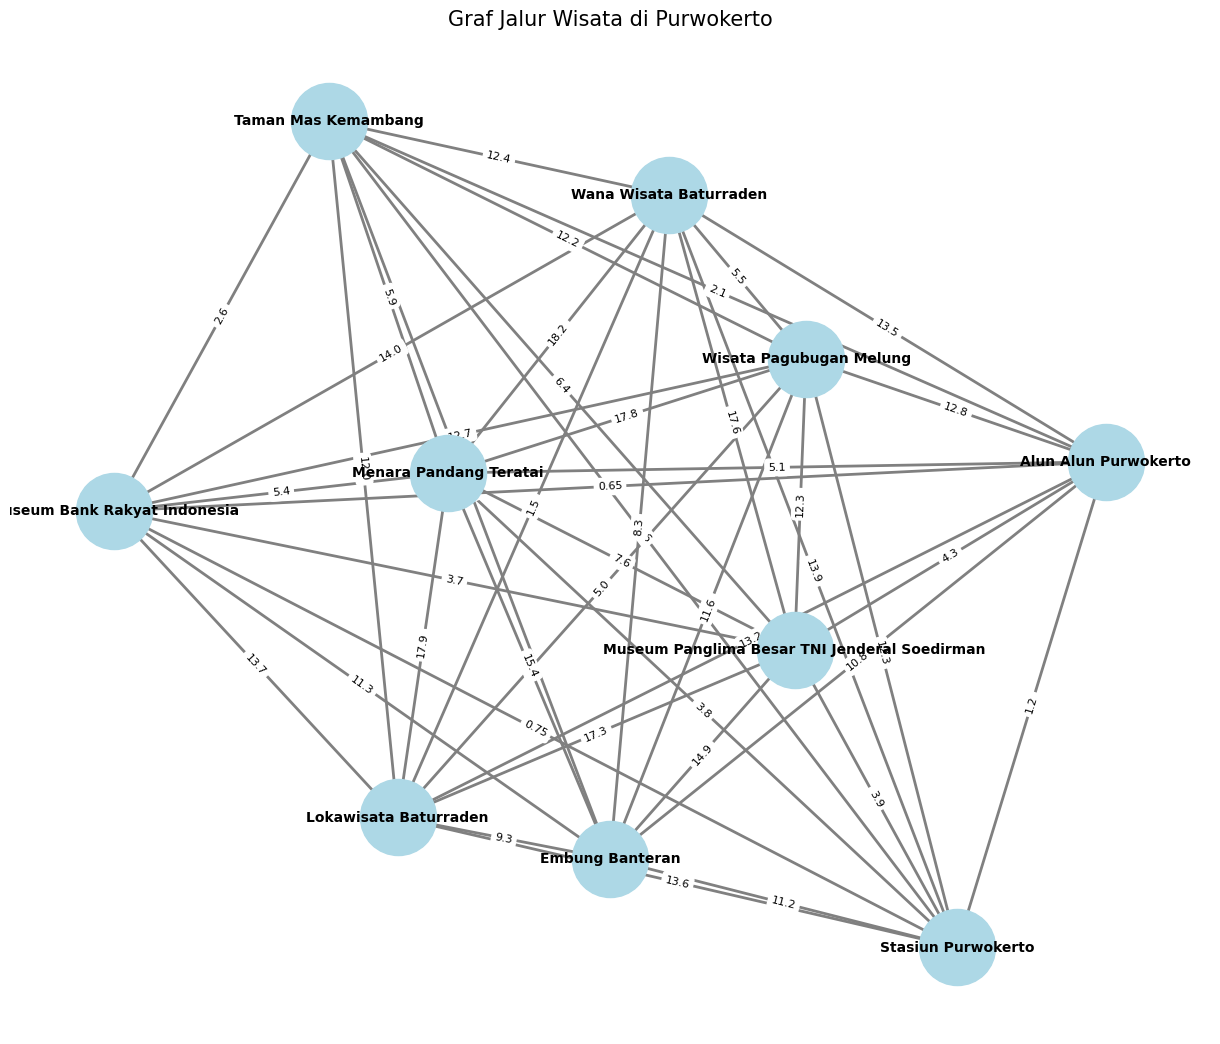

In [ ]:
# Visualisasi graf
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.title("Graf Jalur Wisata di Purwokerto", fontsize=15)
plt.axis('off')
plt.show()

# **BONUS - OPSIONAL**

In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

In [ ]:
# Koordinat tempat wisata
locations = {
    'Stasiun Purwokerto': (-7.4056, 109.2399),
    'Alun Alun Purwokerto': (-7.4117, 109.2364),
    'Menara Pandang Teratai': (-7.4284, 109.2644),
    'Museum Bank Rakyat Indonesia': (-7.4199, 109.2411),
    'Museum Panglima Besar TNI Jenderal Soedirman': (-7.4131, 109.2426),
    'Taman Mas Kemambang': (-7.4146, 109.2383),
    'Lokawisata Baturraden': (-7.4783, 109.1962),
    'Embung Banteran': (-7.4844, 109.2179),
    'Wisata Pagubugan Melung': (-7.4624, 109.3126),
    'Wana Wisata Baturraden': (-7.4803, 109.1807)
}

place_info = {
    'Stasiun Purwokerto': 'Stasiun kereta api utama di Purwokerto, lokasi strategis.',
    'Alun Alun Purwokerto': 'Alun-alun kota yang luas dengan taman hijau untuk bersantai.',
    'Menara Pandang Teratai': 'Menara dengan pemandangan indah dari atas kota Purwokerto.',
    'Museum Bank Rakyat Indonesia': 'Museum yang berfokus pada sejarah Bank Rakyat Indonesia.',
    'Museum Panglima Besar TNI Jenderal Soedirman': 'Museum yang memperkenalkan sejarah perjuangan TNI.',
    'Taman Mas Kemambang': 'Taman kota dengan berbagai fasilitas rekreasi.',
    'Lokawisata Baturraden': 'Destinasi wisata alam dengan pemandangan alam yang memukau.',
    'Embung Banteran': 'Embung atau danau buatan yang cocok untuk wisata alam dan relaksasi.',
    'Wisata Pagubugan Melung': 'Tempat wisata alam dengan jalur pendakian yang menarik.',
    'Wana Wisata Baturraden': 'Tempat wisata alam dengan hutan tropis yang sejuk.'
}

In [ ]:
INF = float('inf')
distance_matrix = np.array([
    [0.0, 1.2, 3.8, 0.75, 3.9, 2.6, 13.6, 11.2, 12.3, 13.9],  # Stasiun Purwokerto
    [1.2, 0.0, 5.1, 0.65, 4.3, 2.1, 13.2, 10.8, 12.8, 13.5],  # Alun Alun Purwokerto
    [3.8, 5.1, 0.0, 5.4, 7.6, 5.9, 17.9, 15.4, 17.8, 18.2],   # Menara Pandang Teratai
    [0.75, 0.65, 5.4, 0.0, 3.7, 2.6, 13.7, 11.3, 12.7, 14.0],  # Museum Bank Rakyat Indonesia
    [3.9, 4.3, 7.6, 3.7, 0.0, 6.4, 17.3, 14.9, 12.3, 17.6],   # Museum Panglima Besar TNI Jenderal Soedirman
    [2.6, 2.1, 5.9, 2.6, 6.4, 0.0, 12.0, 8.7, 12.2, 12.4],    # Taman Mas Kemambang
    [13.6, 13.2, 17.9, 13.7, 17.3, 12.0, 0.0, 9.3, 5.0, 1.5],  # Lokawisata Baturraden
    [11.2, 10.8, 15.4, 11.3, 14.9, 8.7, 9.3, 0.0, 11.6, 8.3],  # Embung Banteran
    [12.3, 12.8, 17.8, 12.7, 12.3, 12.2, 5.0, 11.6, 0.0, 5.5],  # Wisata Pagubugan Melung
    [13.9, 13.5, 18.2, 14.0, 17.6, 12.4, 1.5, 8.3, 5.5, 0.0]    # Wana Wisata Baturraden
])

In [ ]:
def floyd_warshall(dist_matrix):
    n = len(dist_matrix)
    dist = np.copy(dist_matrix)
    next_node = np.full((n, n), -1, dtype=int)

    for i in range(n):
        for j in range(n):
            if dist[i][j] != INF and i != j:
                next_node[i][j] = j
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    return dist, next_node

In [ ]:
def get_shortest_path(next_node, start, end):
    if next_node[start][end] == -1:  # Jika tidak ada jalur
        return []

    path = [start]
    while start != end:
        start = next_node[start][end]
        path.append(start)

    return path

distances, next_node = floyd_warshall(distance_matrix)

In [ ]:
def show_route(start_place, end_place):
    # If lokasi asal dan tujuan sama
    if start_place == end_place:
        print(f"Lokasi asal dan tujuan tidak boleh sama.")
        return None

    start_idx = list(locations.keys()).index(start_place)
    end_idx = list(locations.keys()).index(end_place)

    # Find jalur terpendek
    path = get_shortest_path(next_node, start_idx, end_idx)
    path_names = [list(locations.keys())[k] for k in path]

    print(f"Jalur terpendek dari {start_place} ke {end_place}: {' -> '.join(path_names)}")
    print(f"Jarak terpendek: {distances[start_idx][end_idx]:.2f} km")

    # Create map dg rute terpendek
    m = folium.Map(location=locations[start_place], zoom_start=13)

    # Marker
    folium.Marker(locations[start_place], popup=f"<b>{start_place}</b>", icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(locations[end_place], popup=f"<b>{end_place}</b>", icon=folium.Icon(color='red')).add_to(m)

    # Add ruter terpendek
    coords = [locations[place] for place in path_names]
    folium.PolyLine(coords, color="blue", weight=3, opacity=1).add_to(m)

    return m

interact(show_route,
         start_place=widgets.Dropdown(options=locations.keys(), description='Lokasi Asal:'),
         end_place=widgets.Dropdown(options=locations.keys(), description='Lokasi Tujuan:'))


interactive(children=(Dropdown(description='Lokasi Asal:', options=('Stasiun Purwokerto', 'Alun Alun Purwokert…

<function __main__.show_route(start_place, end_place)>